# P7 Chapter 5a Thomas Hodgkin MD's networks - Part one #

## Chapter 6 Section 6.22  ##

file_name: jnb_hddt_laidlaw

# 7.8.1 Protecting the Empire's Humanity: Thomas Hodgkin and British Colonial     Activism 1830 - 1870 (Zoë Laidlaw 2021)  #

This 'HDDT - JNB' exercise analyses the persons listed in the index to Protecting the Empire's Humanity (Laidlaw 2021), (PEH), and correspondence received by and correspondence sent to Thomas Hodgkin MD 1799 - 1861, in the indexes to the Wellcome Inst., Hodgkin Family Archives. Selected persons from both archives are then compared with the CEDA database persons. The relationship between the three datasets is then examined to determine the extent to which the networks overlap or fit together; if a Hodgkin political activist network, then emerges, how central is that network to the activism of the wider CEDA network and do insights emerge that might indicate who the key influencers in the network might be?

# 7.8.2 GitHub #

Make a private GitHub repository for the exercise and clone it to the University of Birmingham secure server space allocated for this project. https://github.com/KelvinBeerJones/jnb_hddt_laidlaw cloned to: http://localhost:8888/tree/OneDrive%20-20University%20of%20Birmingham/HDDT/jnb_project_containers/jnb_hddt_laidlaw

# 7.8.3 Call up the python packages needed to perform the analysis #

1. Pandas, numpy and pyplotlib, which we will use to create tables and charts in the Workbook.
2. Plot.rc to specify the dimensions for all imported images (this keeps images to a uniform size and shape).
3. Itemgetter, NetworkX and nbconvert to create a Gexf file for Gephi, which is used to generate visualisation graph files and to enable visual analysis of the social networks to take place. 
4. A csv reader to extract the selected sqlite database data from the curated views.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

#This part of networkx, 
# for community detection, needs to be imported separately.
import nbconvert
import csv

# <img src="xxxx.png">

# 7.8.4 Call up the csv files from the SQL db and prepare data for Gephi # 

In [2]:
# produce a 'names' file of nodes and a 'tuples' file of edges_attributes
# to generate the files need to produce GefX files for Gephi.

person_names = pd.read_csv ('vw_hddt_person_table.csv')

person_data_source = pd.read_csv ('vw_hddt_person_with_data_source.csv')

# Use these csv files in the 'with open' statements below 
# to generate locations.gexf

names = pd.read_csv ('vw_hddt_person_name.csv')# For nodes csv
tuples = pd.read_csv ('vw_hddt_ceda_tuples.csv')# For edges.csv

with open('vw_hddt_person_name.csv', 'r') as nodecsv: 

# Open the Nodes csv file
    nodereader = csv.reader(nodecsv) 

# Read the csv
    nodes = [n for n in nodereader][1:]

# Retrieve the data (using Python list comprhension and list slicing
# to remove the header row

    node_names = [n[0] for n in nodes] 
    
# Get a list of only the node names

with open('vw_hddt_ceda_tuples.csv', 'r') as edgecsv: 
    
# Open the file

    edgereader = csv.reader(edgecsv) 
# Read the csv

    edge_list = list(edgereader) 

# Convert to list, so can iterate below in for loop
    
# Create empty arrays to store edge data and edge attribute data

edges = []
edges_attributes = []
    
# Fill the arrays with data from CSV

for e in edge_list[1:]:
    edges.append(tuple(e[0:2])) 
    
# Get the first 2 columns (source, target) and add to array
# not used this time. edges_attributes.append(tuple(e[2:4])) 
# Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   


# 7.8.5 Introduction to the exercise - Part One #

Laidlaw in the introduction to PEH sets out the importance of the social networks of Dr Thomas Hodgkin MD, “The roots of this book lie in the personal correspondence of the Quaker, scientist, and activist, Dr Thomas Hodgkin”, and “The exploration of Britain’s imperial history presented in this book is profoundly shaped by Thomas Hodgkin’s personal papers, today housed in the Wellcome library in London, and what they reveal of his philanthropic, medical, and scientific interests and networks. The volume and the breadth of that archive has allowed me to trace and assess a wide array of influences on “imperial humanitarianism” (2021, 3). Laidlaw also says that, Hodgkin’s personal archive at the Wellcome Institute constitutes The “backbone” of the book and that “Its study reveals 50 years’ worth of unlikely connections, sustained relationships, and closely argued, if sometimes contradictory, cases” (2021, 7).

Chapter 5 of the thesis argues that by only describing them in narratives it is difficult to 'see' the people who formed the extensive social networks in which Thomas Hodgkin MD operated, how many there were and how they relate to each other. And so, PEH, while discussing at length the efforts of Hodgkin's social networks to relieve the plight of aborigines throughout the British Empire, does not make those networks visible or make them available to scrutiny. This Historical Data Analysis (HDA) fully addresses those two needs and presents new insights about Hodgkin’s networks that are difficult to achieve without an HDDT.

# 7.8.6 The 3094 members of the CEDA before the exercise #

Before the Laidlaw exercise is performed, we can see in the Gephi graph the CEDA network using the Force Atlas algorithm. Far left and at the bottom we can see the QCA and those members of the QCA who led in the formation of the APS (which appears in purple). Two members of the QCA who join the APS also join with non QCA members of the APS in joining the ESL in 1843.
These two are William Allen (who would die that year) and Thomas Hodgkin MD. In connecting up the QCA, the APS and the ESL these two stand out from the other members of the QCA, (half of whom go on to join the APS) but participate no further in network building. There is no discernible network centered on Hodgkin alone. Thomas Hodgkin's personal network does not appear as a group node. The memberships of the ESL, the Anthropological Society of London (ASL) and Anthropological Institute (AI) are frequently shared. The ESL splits into two groups each of roughly equal size, those who are members of only the ESL and those members of the ESL who also share membership with the AI and ASL. The ASL (formed last in 1863) draws its membership from both the ESL and the AI. It is the ASL that will provide the bulk of the first memberships of the RAI. We can see 'ringed' the small groups of key influencers who network between the CEDA groups.

<img src="ceda_ringed.png">

| Society | abv. | Dates | Colour |
| --- | --- | --- | --- |
| Quaker Committee on the Aborigines* | QCA | 1832/37 - 1846 | Dark green |
| Aborigines Protection Society | APS | 1837 - 1919 | Purple |
| Ethnological Society of London | ESL | 1843 - 1871 | Blue |
| Anthropological Institute | AI | 1843 - 1871 | Orange | 
| Anthropological Society of London | ASL | 1863 - 1871 | Green |

# 7.8.7 Mods to db to facilitate this exercise - ZOE and WEL #

## (1) Persons in the index to PEH, and the members of the CEDA ##


All the person names were extracted from the PEH index (Laidlaw 2021, 359). Of the 290 person names in the index 108 were found to be already present in the HTTD CEDA dataset. The remaining 182 do not appear in the HDDT CEDA dataset, some of those indexed in PEH will not be members of Hodgkin’s support network, but rather persons that Laidlaw has referenced in PEH for other reasons (for example King William IV, Queen Victoria, and many colonial officers of the Crown).

| all persons PEH | PEH persons CEDA | PEH persons not CEDA |
|---|---|---|
| 290 | 108 | 182 |

Note: At least 15 persons amongst the 182 non CEDA persons appearing in the index to PEH could be family members of persons already captured in the HDDT - from the awareness of the author of this thesis. Nonetheless the intention here is to discover how the 108 who are recorded in the HDDT database relate both to each other and the wider group of 3000 already in the HDDT, and to disregard the 182 who are not.

## (2) Persons in the indexes to WEL, and the members of the CEDA ##

Because PEH relies heavily on the Hodgkin Family Archive at the Wellcome Institute an analysis of the two indexes to that collection was performed to extract from the index of letters sent and the index of letters received by Thomas Hodgkin MD those persons who appeared in both indexes indicating the these persons might have been members of Hodgkin’s network.

In the Wellcome Hodgkin Family archive data indexes there are 107 person Hodgkin writes to and who also write to him, and of these 46 appear in the HDDT database and 61 do not. As in the PEH index exercise above we can reasonably assume both that some of these persons not already in the HDDT may be related to members of persons appearing in the HDDT database; and also, that many will not, for example we can expect to find many medical related correspondences in an archive collected by a medical history archive, and these are outside the scope of this thesis (which analyses political activism).

| all persons WEL | WEL persons CEDA | WEL persons not CEDA |
|---|---|---|
|107|46|61|

## (3) Summary of db mods #

Using the platform DBeaver (https://dbeaver.io/) the HDDT CEDA database was modified to accommodate the exercise:
1. We added to person_data_source table two new temporary data sources – ZOE and WEL
2. We added to ceda table two new CEDA groups – ZOE and WEL
3. Person_table. We uploaded 182 new records from a csv file of Laidlaw references, and allocated them to data_source = ZOE.
4. Person_table. We uploaded 61 new records from a csv file of Laidlaw references, and allocated them to data_source = WEL.
5. We updated m2m_person_ceda table to allocate 108 persons to a new CEDA group = ZOE
6. We updated m2m_person_ceda table to allocate 46 persons to a new CEDA group = WEL

Once the data from both ZOE and WEL had been added to the HDDT database the network analysis could be performed and a report in the form of a Jupyter Notebook made.

# 7.8.8 Assess persons in the index to PEH who are members of the CEDA. ##

The Index to PEH lists 108 persons who already present in the HDDT CEDA db. They were
laidlaw allocated to a ‘dummy’ CEDA group (table CEDA, Target = ‘ZOE’). This enables the visualisation of Laidlaw’s Hodgkin network and shows its relationships to the original HDDT CEDA groups.

The indexes to WEL list 46 persons who are already present in the HDDT CEDA db. They were allocated to a ‘dummy’ CEDA group (table CEDA, Target = ‘WEL’). This enables the visualisation of The Wellcome Inst., Hodgkin Family Archive Thomas Hodgkin MD network and shows its relationships to the original HDDT CEDA groups.

The 3337 persons in the CEDA db., make up 3892 memberships of the original CEDA (QCA, APS, ESL, AI, and the APS) The above 'new' CEDA were set up in the SQL db., to facilitate this exercise.

| Original CEDA | ZOE | WEL | Total new |
|---|---|---|---|
|3892|108|46|4046|

# 7.8.9 CEDA members compared to non-CEDA others in PEH index #

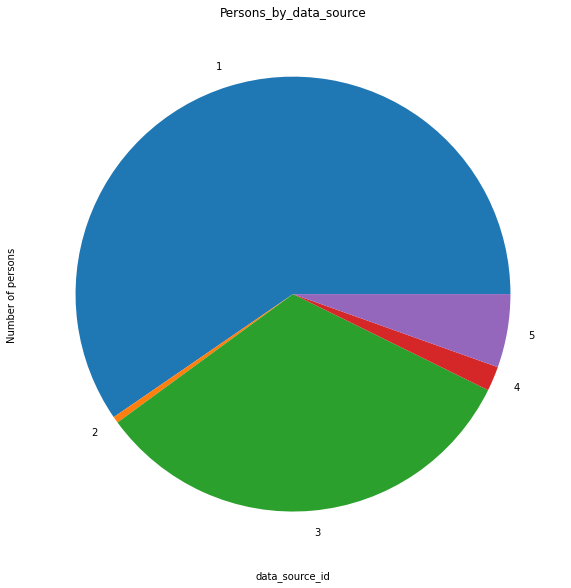

In [3]:
person_names.groupby('data_source_id')['Name'].nunique().plot(kind='pie')
plt.title ("Persons_by_data_source")
plt.xlabel ("data_source_id")
plt.ylabel ("Number of persons")
plt.show()




| data_source_id | Source |
| --- | --- |
| 1 | RAI |
| 2 | QCA |
| 3 | APS |
| 4 | WEL |
| 5 | ZOE |


The persons from PEH Index and the Welcome Inst., indexes who are not members of a CEDA appear here. They are disregarded in this exercise because they do not indicate the presence of a social network. They are shown here only for completeness.

### Add 182 'ZOE' and 61 'WEL' Non CEDA persons to the SQL db., 'temporarily' solely to visualise the extent of persons not included in this exercise. ###

# 7.8.10 Data verification #

In each of Code cells 4 - 11 We call up the tables we have obtained from the db to view the data. We can confirm (e.g., Code cell 4) that we have selected the correct table or view from the db., and we check that the first 5 and last 5 records have been rendered correctly. We can confirm (e.g. Code cell 5) that the respective table dataframe is formatted as expected. We also check that the number of records equals the number of rows on the data source csv.

### Code cell 4 ###

In [4]:
person_names

,Name,title,gender_id,birth_year,death_year,data_source_id
0,Arthur William A Beckett,NaN,1.0,1844.0,1909.0,1
1,Andrew Mercer Adam,NaN,1.0,NaN,NaN,1
2,H R Adam,NaN,1.0,NaN,NaN,1
3,William Adam,NaN,1.0,NaN,NaN,1
4,Henry John Adams,NaN,1.0,NaN,NaN,1
...,...,...,...,...,...,...
3332,James Wetherall,NaN,NaN,NaN,NaN,5
3333,William Wilberforce,NaN,NaN,NaN,NaN,5
3334,King William IV,NaN,NaN,NaN,NaN,5
3335,x Wiremu Kingi Te rangitake,NaN,NaN,NaN,NaN,5


### Code cell 5 ###

In [5]:
person_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3337 non-null   object 
 1   title           776 non-null    object 
 2   gender_id       1988 non-null   float64
 3   birth_year      1003 non-null   float64
 4   death_year      1069 non-null   float64
 5   data_source_id  3337 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 156.5+ KB


### Code cell 6 ###

In [6]:
person_data_source

,Name,data_source
0,Arthur William A Beckett,RAI
1,Andrew Mercer Adam,RAI
2,H R Adam,RAI
3,William Adam,RAI
4,Henry John Adams,RAI
...,...,...
3332,James Wetherall,ZOE
3333,William Wilberforce,ZOE
3334,King William IV,ZOE
3335,x Wiremu Kingi Te rangitake,ZOE


### Code cell 7 ###

In [7]:
person_data_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         3337 non-null   object
 1   data_source  3337 non-null   object
dtypes: object(2)
memory usage: 52.3+ KB


### Code cell 8 ###

In [8]:
names

,Name
0,Arthur William A Beckett
1,Andrew Mercer Adam
2,H R Adam
3,William Adam
4,Henry John Adams
...,...
3332,James Wetherall
3333,William Wilberforce
3334,King William IV
3335,x Wiremu Kingi Te rangitake


### Code cell 9 ###

In [9]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3337 non-null   object
dtypes: object(1)
memory usage: 26.2+ KB


### Code cell 10 ###

In [10]:
tuples

,Source,Target
0,William Adam,ESL
1,William (1) Adams,ESL
2,William (2) Adams,ESL
3,Louis Agassiz,ESL
4,Augustine Aglio,ESL
...,...,...
4041,Frederick Cooper,WEL
4042,Henry Christy,WEL
4043,James (1) Backhouse,WEL
4044,William (Capt.) Allen,WEL


### Code cell 11 ###

In [11]:
tuples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  4046 non-null   object
 1   Target  4046 non-null   object
dtypes: object(2)
memory usage: 63.3+ KB


# 7.8.11 Generate gexf file for Gephi visualisation #

### Code cell 12 - 13 Check that Gephi 'Nodes' and 'Edges' files agree with 'names' and 'tuples' files ###

### Code cell 12 ###

In [12]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))

Nodes length:  3337
Edges length:  4046


### Code cell 13 ###

In [13]:
print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])

First 5 nodes: ['Arthur William A Beckett', 'Andrew Mercer Adam', 'H R Adam', 'William Adam', 'Henry John Adams']
First 5 edges: [('William Adam', 'ESL'), ('William (1) Adams', 'ESL'), ('William (2) Adams', 'ESL'), ('Louis Agassiz', 'ESL'), ('Augustine Aglio', 'ESL')]


### Code cell 14 Execute NetworkX function ###

In [14]:
# We use NetworkX to build the graph data into a table

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3344
Number of edges: 4046
Average degree:   2.4199


The number of nodes here is 3337 persons plus 7 societies = 3344 (the additional 7 nodes are the CEDA names (CQA, APS, ESL, AI, ASL, ZOE and WEL). Gephi will produce a 'bigraph' of the selected data and a bigraph is a graph where relationships are between individual persons (one node) and membership organisations, many nodes).

### Code cell 15 Write the gexf file ### 

In [15]:
# Finally we can write a gexf file which will be placed in the root directory.
# We can then open the file in Gephi and visualize the network.

nx.write_gexf(G, 'ceda_laidlaw.gexf')

# 7.8.12 Visual analysis of the exercise #

We then open the gexf file in Gephi and generate a graph file using the Force Atlas algorithm, the 'network diameter', 'modularity' routines and the 'appearance' routines to produce a suitable graph for analysis. (Running these routines in Gephi allows graph display and placement, colour and size of nodes, modularity to identify clearly the large society groups and betweenness centrality to reveal individuals and the smaller groups who play important roles linking groups together. It should be noted that the visualisation and all of its topography are the result of running the above algorithms, it is not manually arranged on the page!
Finally we save the graph in Gephi as a 'project file' to the JNB container for this exercise, and we also produce PNG files of the graph and selected areas. Finally we can import the png images of the Gephi graph file to this JNB to illustrate the network analysis performed in the Gephi platform.

# 7.8.13 The CEDA social network including ZOE and WEL ###

We have created two 'dummy' groups (ZOE and WEL) to show the persons who are members of the original CEDA and who appear in the index of PEH as Zoe, and those from the Wellcome Inst., as WEL. They appear in this graph in orange. Also in orange is the QCA group. It is helpful to show QCA alongside the two dummy groups because Thomas Hodgkin MD begins his political work in the QCA (as discussed in PEH), and all three groups are arguably Thomas Hodgkin MD groups. ZOE is centre, WEL to the right and QCA to the left. We can see that the dummy groups are centered in the Force Atlas graph and that they connect up all of the main CEDA groups. This is a visible confirmation that the Thomas Hodgkin MD network referenced in PEH is well placed and well connected. The presence of the dummy groups brings Thomas Hodgkin MD to the very centre of the graph, this is impressive given that the entire population is 3337 persons. But it is important to note that Hodgkin does not 'sit' within the community referenced by Laidlaw or that suggested by the WEL analysis, he sits to one side because as much as he is attracted to Laidlaw's and the WEL groups he is 'pulled' away from them because of his connections to the QCA and ESL.

<img src="laidlaw_ringed.png">

| Society | abv. | Dates | Colour |
| --- | --- | --- | --- |
| Quaker Committee on the Aborigines, Protecting the Empire's Humanity and Welcome Inst., | QCA, PEH, WEL | 1832/37 - 1846 | Orange |
| Aborigines Protection Society | APS | 1837 - 1919 | Purple |
| Ethnological Society of London | ESL | 1843 - 1871 | Blue |
| Anthropological Society of London | ASL | 1863 - 1871 | Green |
| Anthropological Institute | AI | 1843 - 1871 | grey | 

Note: Gephi allows detailed examination of this network

# 7.8.14 Zooming in to show the network in detail #

<img src="laidlaw_detail_ringed.png">

# 7.8.15 Other groupings emerge #

Other smaller groups that liaise between Hodgkin and the CEDA also become visible in the graph, and these are worthy of further study.

<img src="laidlaw_jnb_ringed.png">

# 7.8.16 Quaker roles emerge in detail #

PEH also references 6 (of the 15) Quakers who were members of the QCA - Josiah and William Forster, Robert Howard, Peter Bedford, Joseph Sturge and Robert Alsop (Jun)and they can be seen here networking between the QCA, APS, ZOE and Thomas Hodgkin MD.

<img src="Laidlaw_qca_ringed.png">

# 7.8.17 Conclusions #

This exercise has shown that although Thomas Hodgkin's networks appear only in the index in PEH and in the Wellcome Inst., Hodgkin Archive, in neither of these sources can political activist relationships be easily deduced but, by using data analysis and data visualisation technology thenetworks argued in PEH can be shown and analysed very clearly.

The HDDT CEDA db., comprises the 3000 memberships of CEDA societies concerned firstly with the plight of aborigines, but then quickly afterwards with institution building in the science of ethnology and anthropology and within which Thomas Hodgkin was a key influencer. Placing PEH's Hodgkin networks alongside the HDDT networks, a much fuller view of community’s political activism is obtained, where the centrality of Hodgkin's networks to the work of all of the CEDA networks is evident. Clearly, Laidlaw in PEH has in referencing over 100 key networkers, identified those who have close working connections with Hodgkin, and these networks are central to the workings of the greater networks of the CEDA. Other smaller embedded networking groups that liaise between Hodgkin and the CEDA have also been revealed, and these are worthy of further detailed study.

Although PEH offers a literary description of the networks of Hodgkin, Hodgkin himself does not get subsumed by the Gephi graph algorithms into ZOE or WEL, instead he stands aside. This is because, as we can see, his relationships with Quakers and the APS are strong enough to resist the attraction of his relationships with ZOE or WEL networks. This finding is important because it gives good reason to examine Hodgkin’s relationships further with both QCA and the APS (and the ESL). Six Quakers who are key networkers between Hodgkin's concern for the plight of aborigines and his institution building in the science of anthropology also can be identified and their presence will help to shape the next exercise.

Chapter 6 will thoroughly explore the role of Quakers and chapter 7 the role of Hodgkin's networks supporting institution building in ethnology and anthropology within the APS and the ESL.

The exercise confirms and supports the centrality and importance of Hodgkin's networks as set out in the index to PEH and invites further scrutiny of those networks because key individuals and small clusters of persons emerge from the visual analysis.


# 7.8.18 Modifications to the database for Part Two #

The 'dummy' groups ZOE and WEL, after being scrutinised using a Gephi graph file, add richness and insight into the workings of the CEDA networks and the role of Thomas Hodgkin within those networks. The role of Quakers within these networks is also indicated. Because the new data in ZOE and WEL does not include visual anomalies or reveal a large number of outlying persons (who would add no value to a study of person-to-person networks) we can be confident in now modifying the CEDA database permanently by merging them both into a new CEDA group called HOD. This part of the exercise will be performed in Chapter 5 Part Two.

# 7.8.19 Github upload #

We can now update GitHub to pass the exercise and all its resources to the project repo (see step 1) . This enables the entire exercise to be both scrutinised by others and replicated elsewhere.(When the exercise is completed and audited, and all copyright issue resolved the repo can be made public).

## End of laidlaw (part one) ##